In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
import netron
import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv('Apple_stock_data_assignment.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-08-01 00:00:00+00:00,208.43,218.03,206.74,213.900,54017922,50.289470,52.605734,49.881711,51.609258,216071688,0.0,1.0
1,AAPL,2019-08-02 00:00:00+00:00,204.02,206.43,201.63,205.530,40862122,49.225436,49.806915,48.648783,49.589765,163448488,0.0,1.0
2,AAPL,2019-08-05 00:00:00+00:00,193.34,198.65,192.58,197.990,52392969,46.648592,47.929776,46.465222,47.770533,209571876,0.0,1.0
3,AAPL,2019-08-06 00:00:00+00:00,197.00,198.07,194.04,196.310,35824787,47.531668,47.789835,46.817487,47.365187,143299148,0.0,1.0
4,AAPL,2019-08-07 00:00:00+00:00,199.04,199.56,193.82,195.410,33364400,48.023874,48.149339,46.764406,47.148037,133457600,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,AAPL,2024-07-23 00:00:00+00:00,225.01,226.94,222.68,224.365,39960260,225.010000,226.940000,222.680000,224.365000,39960260,0.0,1.0
1252,AAPL,2024-07-24 00:00:00+00:00,218.54,224.80,217.13,224.000,61777576,218.540000,224.800000,217.130000,224.000000,61777576,0.0,1.0
1253,AAPL,2024-07-25 00:00:00+00:00,217.49,220.85,214.62,218.930,51391199,217.490000,220.850000,214.620000,218.930000,51391199,0.0,1.0
1254,AAPL,2024-07-26 00:00:00+00:00,217.96,219.49,216.01,218.700,41601345,217.960000,219.490000,216.010000,218.700000,41601345,0.0,1.0


In [10]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.000000,1256.000000
mean,187.870947,189.831879,185.644217,187.628152,7.185376e+07,137.991340,139.419463,136.432743,137.874331,9.575046e+07,0.005868,1.002389
std,69.370224,70.025374,68.361928,69.090363,3.722684e+07,42.388246,42.690418,42.093024,42.396007,5.225890e+07,0.055476,0.084650
min,106.840000,110.190000,103.100000,104.540000,1.165436e+07,46.648592,47.789835,46.465222,47.148037,2.404834e+07,0.000000,1.000000
25%,144.742500,146.445000,142.651650,144.030000,4.747621e+07,116.314367,117.721802,114.288350,116.270263,6.111504e+07,0.000000,1.000000
50%,169.585000,171.125000,168.210100,169.552500,6.590462e+07,144.802203,146.425209,143.390764,144.765334,8.197389e+07,0.000000,1.000000
75%,195.740000,196.982500,194.140000,195.768750,8.887507e+07,170.612057,172.383136,169.287856,170.354369,1.128573e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,234.820000,237.230000,233.090000,236.480000,4.268849e+08,0.820000,4.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   object 
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.5+ KB


In [14]:
df.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

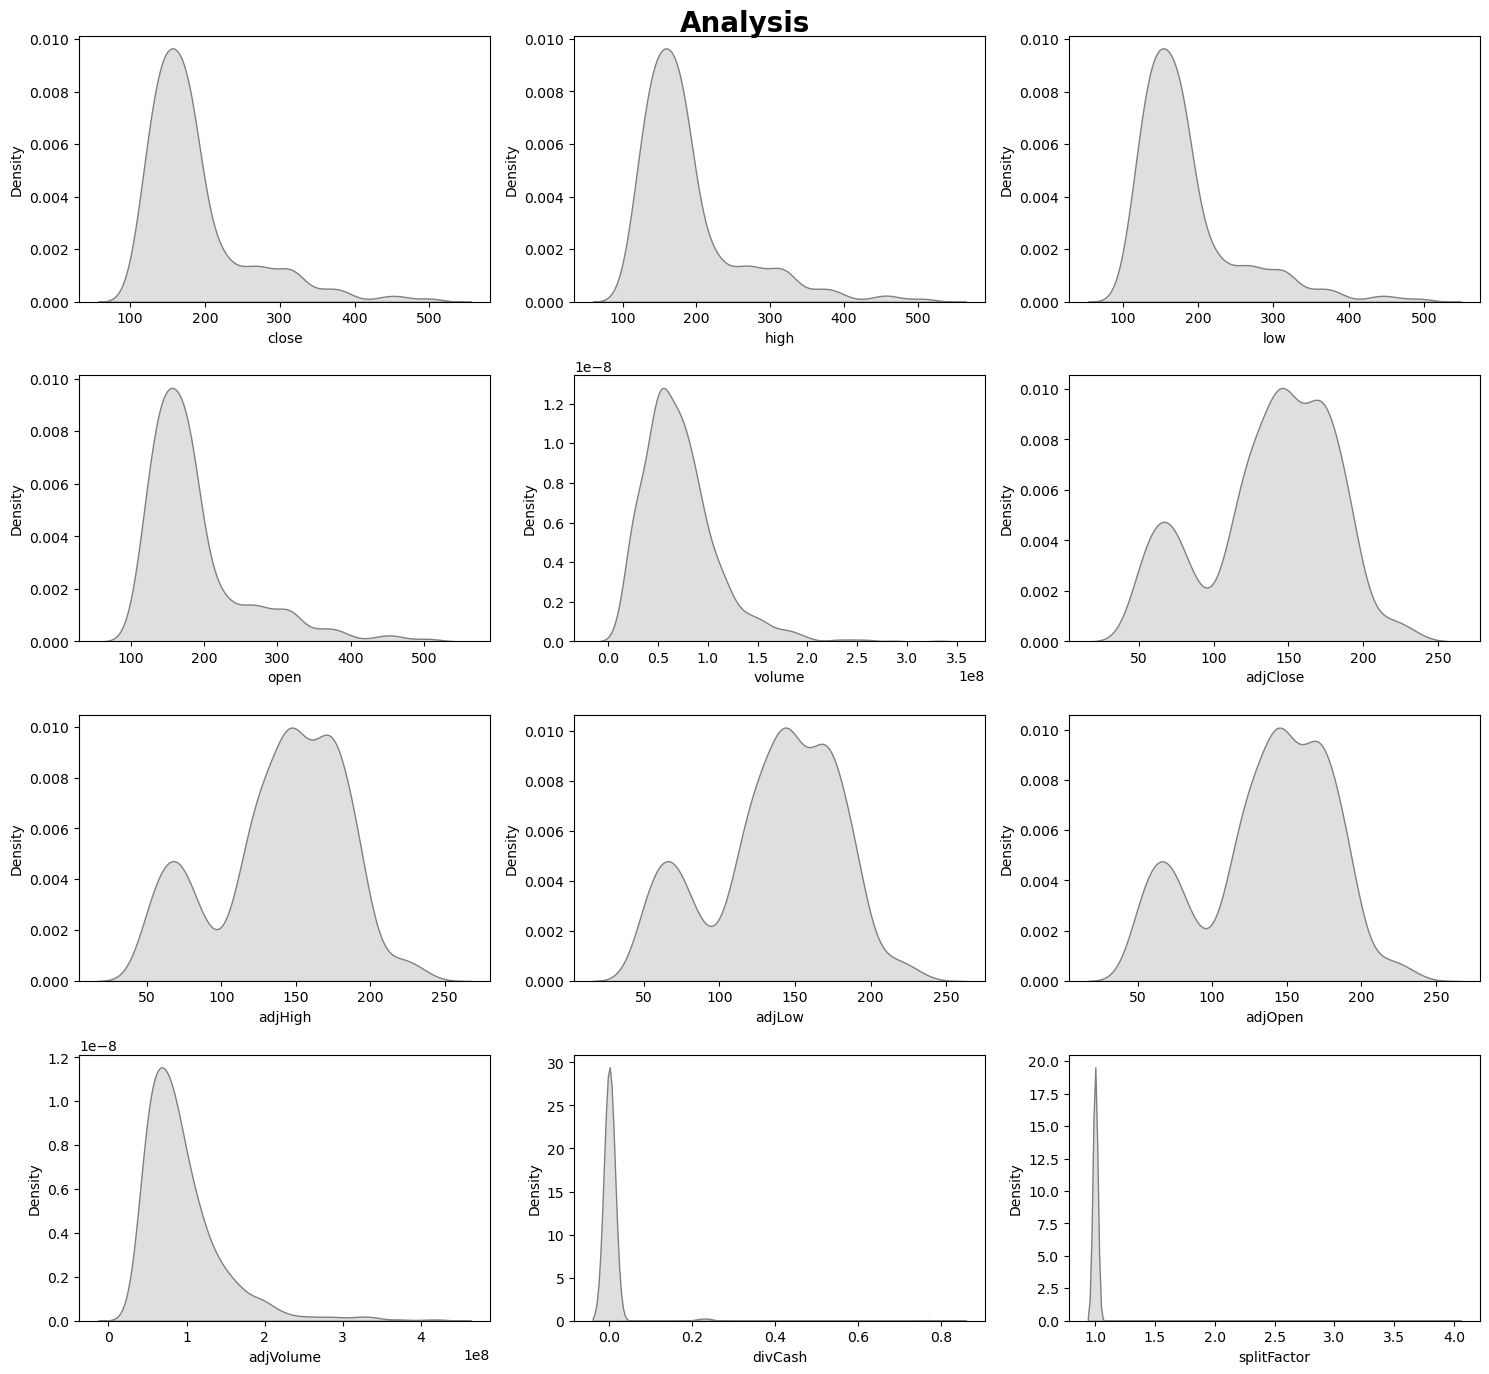

In [59]:
num_feature =[fea for fea in df.columns if df[fea].dtype != object]
plt.figure(figsize=(15,17))
plt.suptitle('Analysis',fontsize=20,fontweight='bold')
for i in range (0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],fill=True,color='Grey') 
    plt.xlabel(num_feature[i])
    plt.tight_layout()

In [73]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [75]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year
0,AAPL,2019-08-01 00:00:00+00:00,208.43,218.03,206.74,213.900,54017922,50.289470,52.605734,49.881711,51.609258,216071688,0.0,1.0,2019
1,AAPL,2019-08-02 00:00:00+00:00,204.02,206.43,201.63,205.530,40862122,49.225436,49.806915,48.648783,49.589765,163448488,0.0,1.0,2019
2,AAPL,2019-08-05 00:00:00+00:00,193.34,198.65,192.58,197.990,52392969,46.648592,47.929776,46.465222,47.770533,209571876,0.0,1.0,2019
3,AAPL,2019-08-06 00:00:00+00:00,197.00,198.07,194.04,196.310,35824787,47.531668,47.789835,46.817487,47.365187,143299148,0.0,1.0,2019
4,AAPL,2019-08-07 00:00:00+00:00,199.04,199.56,193.82,195.410,33364400,48.023874,48.149339,46.764406,47.148037,133457600,0.0,1.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,AAPL,2024-07-23 00:00:00+00:00,225.01,226.94,222.68,224.365,39960260,225.010000,226.940000,222.680000,224.365000,39960260,0.0,1.0,2024
1252,AAPL,2024-07-24 00:00:00+00:00,218.54,224.80,217.13,224.000,61777576,218.540000,224.800000,217.130000,224.000000,61777576,0.0,1.0,2024
1253,AAPL,2024-07-25 00:00:00+00:00,217.49,220.85,214.62,218.930,51391199,217.490000,220.850000,214.620000,218.930000,51391199,0.0,1.0,2024
1254,AAPL,2024-07-26 00:00:00+00:00,217.96,219.49,216.01,218.700,41601345,217.960000,219.490000,216.010000,218.700000,41601345,0.0,1.0,2024


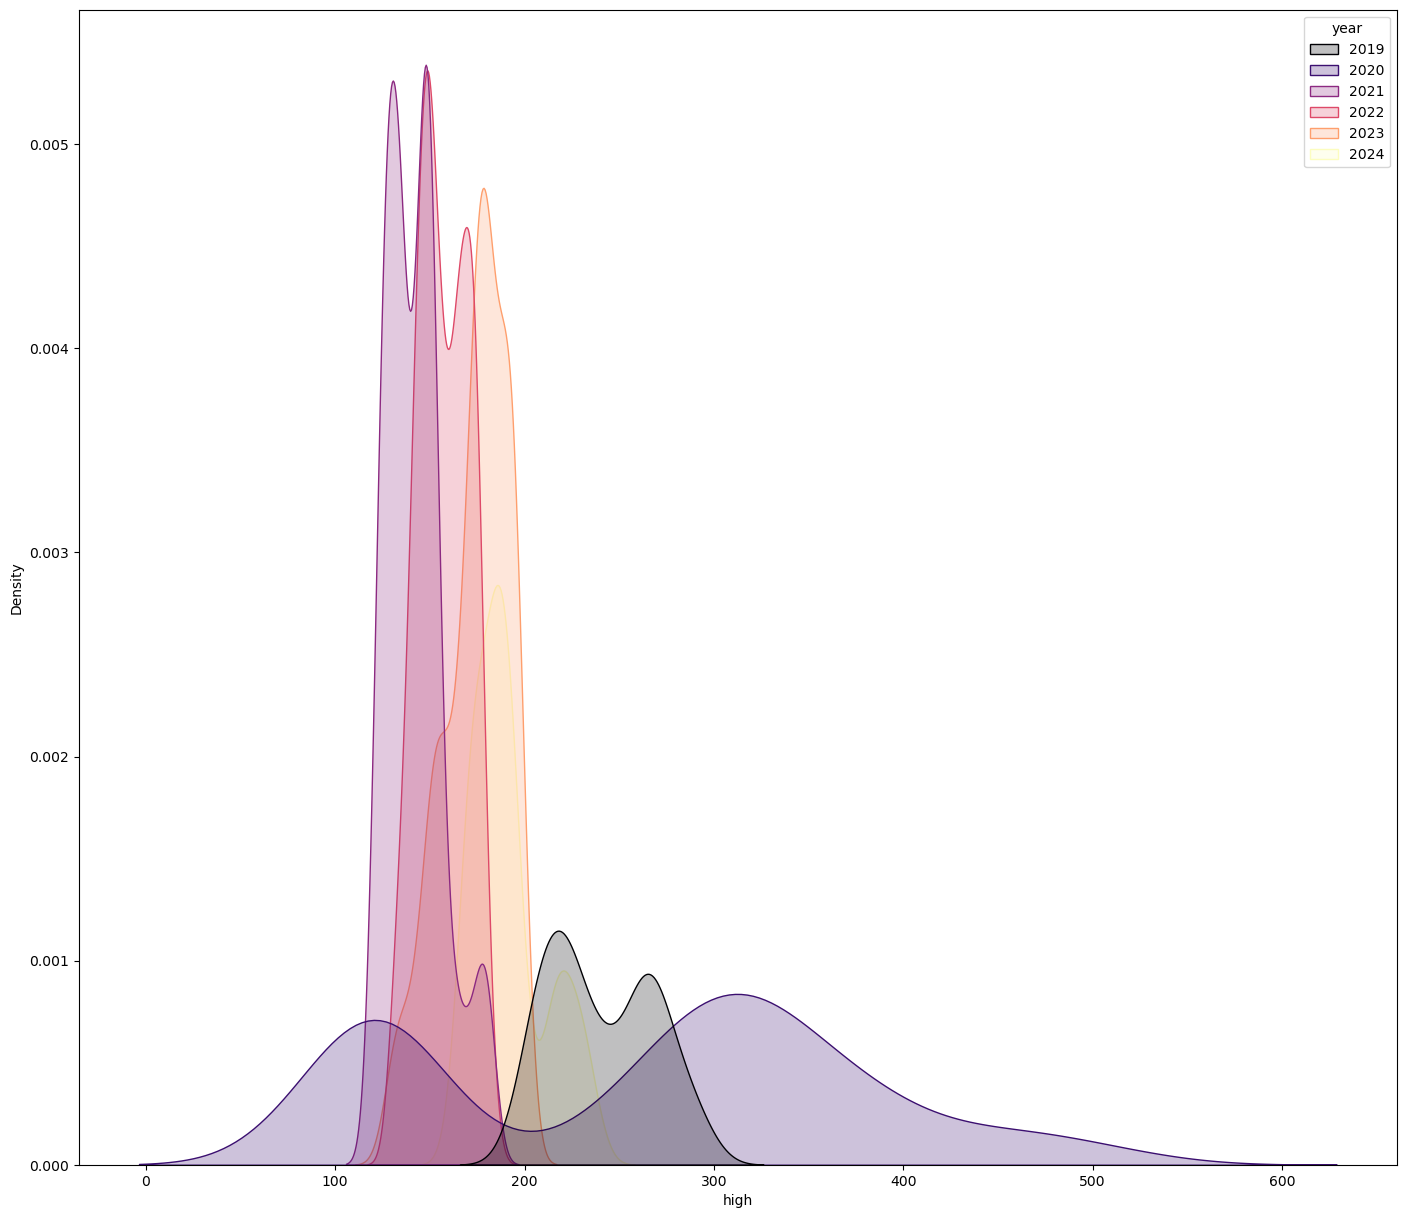

In [97]:
plt.figure(figsize=(17,15))
sns.kdeplot(x=df['high'],hue=df['year'],fill=True,palette='magma')
plt.show()


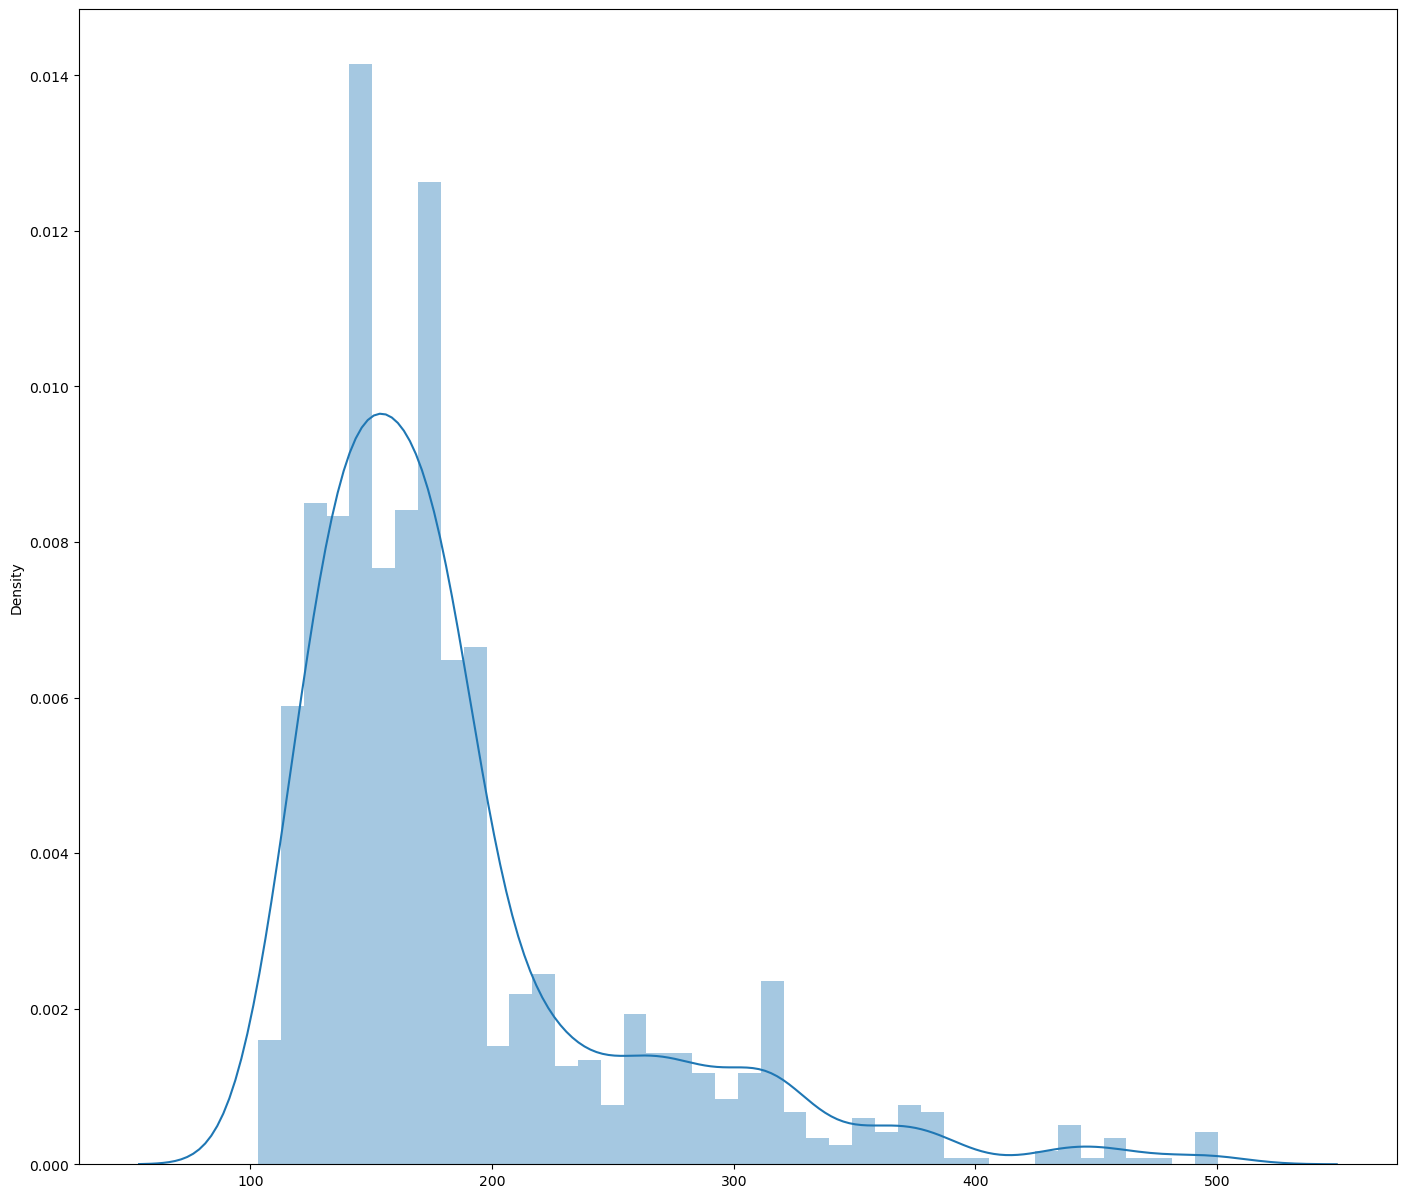

In [101]:
plt.figure(figsize=(17,15))
sns.distplot(x=df['low'])
plt.show()


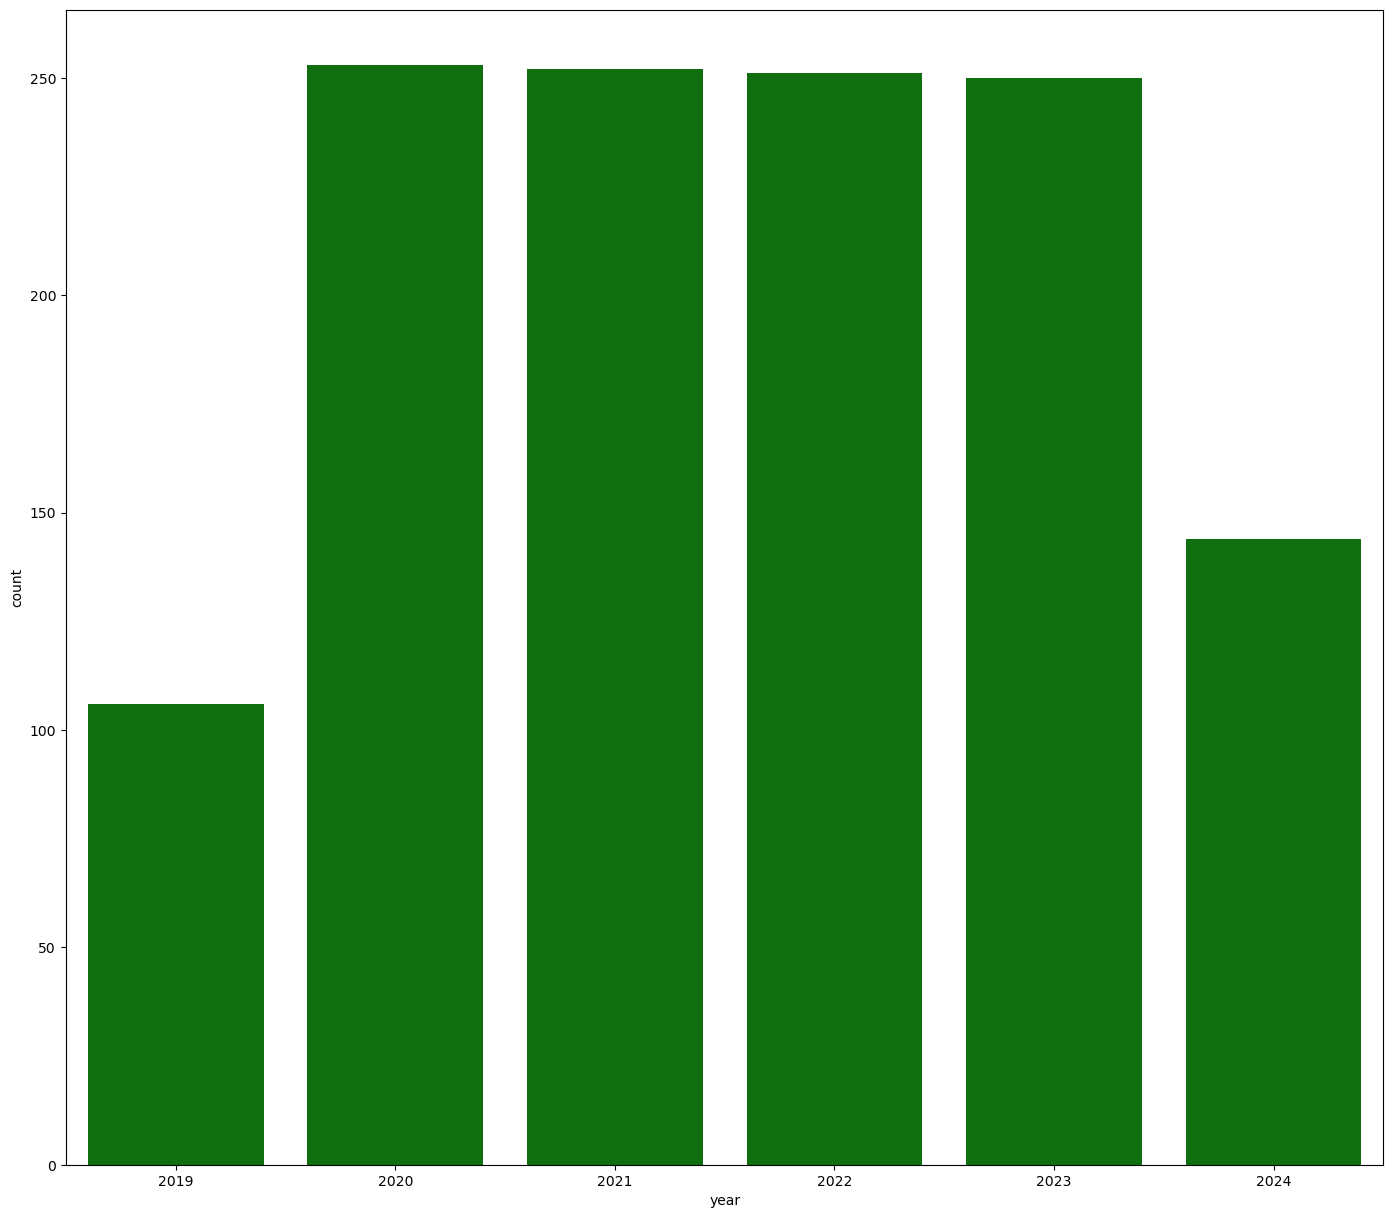

In [105]:
plt.figure(figsize=(17,15))
sns.countplot(x=df['year'],color='g')
plt.show()


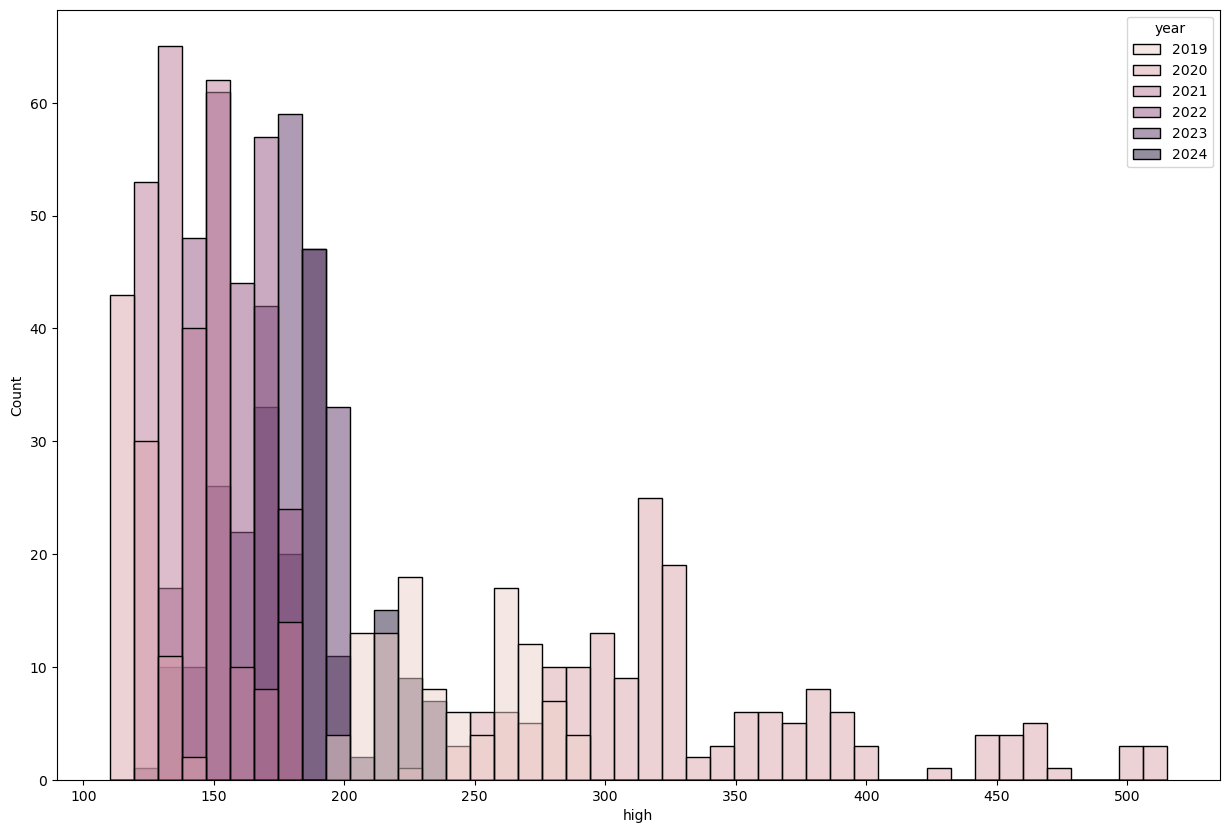

In [117]:
plt.figure(figsize=(15,10))
sns.histplot(x='high',hue='year',data=df)
plt.show()

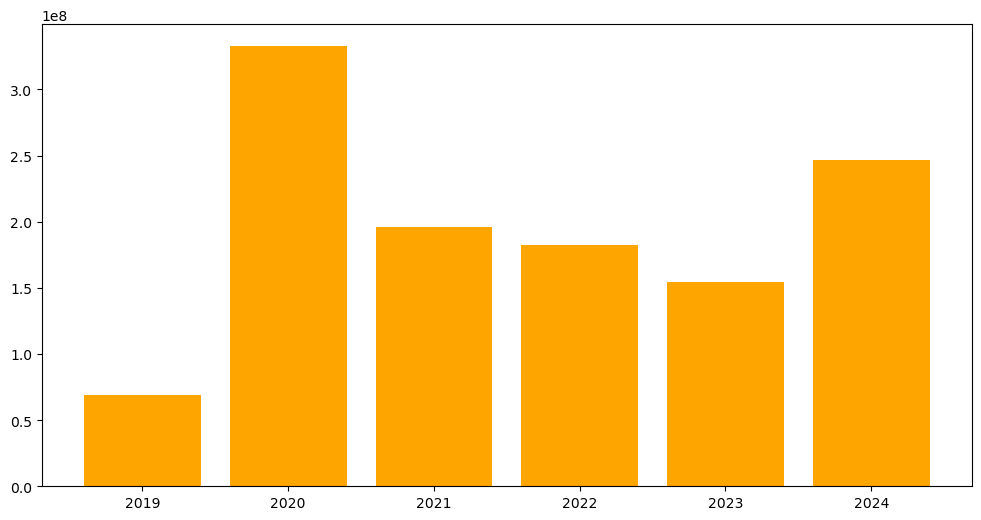

In [145]:
plt.figure(figsize=(12, 6))
plt.bar(df['year'], df['volume'],color='Orange')
plt.show()


In [173]:
df['date'] = pd.to_datetime(df['date']).map(pd.Timestamp.toordinal)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year
0,AAPL,719163,208.43,218.03,206.74,213.900,54017922,50.289470,52.605734,49.881711,51.609258,216071688,0.0,1.0,2019
1,AAPL,719163,204.02,206.43,201.63,205.530,40862122,49.225436,49.806915,48.648783,49.589765,163448488,0.0,1.0,2019
2,AAPL,719163,193.34,198.65,192.58,197.990,52392969,46.648592,47.929776,46.465222,47.770533,209571876,0.0,1.0,2019
3,AAPL,719163,197.00,198.07,194.04,196.310,35824787,47.531668,47.789835,46.817487,47.365187,143299148,0.0,1.0,2019
4,AAPL,719163,199.04,199.56,193.82,195.410,33364400,48.023874,48.149339,46.764406,47.148037,133457600,0.0,1.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,AAPL,719163,225.01,226.94,222.68,224.365,39960260,225.010000,226.940000,222.680000,224.365000,39960260,0.0,1.0,2024
1252,AAPL,719163,218.54,224.80,217.13,224.000,61777576,218.540000,224.800000,217.130000,224.000000,61777576,0.0,1.0,2024
1253,AAPL,719163,217.49,220.85,214.62,218.930,51391199,217.490000,220.850000,214.620000,218.930000,51391199,0.0,1.0,2024
1254,AAPL,719163,217.96,219.49,216.01,218.700,41601345,217.960000,219.490000,216.010000,218.700000,41601345,0.0,1.0,2024


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   int64  
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
 14  year         1256 non-null   int32  
dtypes: float64(10), int32(1), int64(3), object(1)
memory usage: 142.4+ KB


In [181]:
df.drop('symbol',inplace=True,axis=1)

In [211]:
X = df.drop(['adjClose'],axis=1)
y = df['adjClose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.22742615577249978


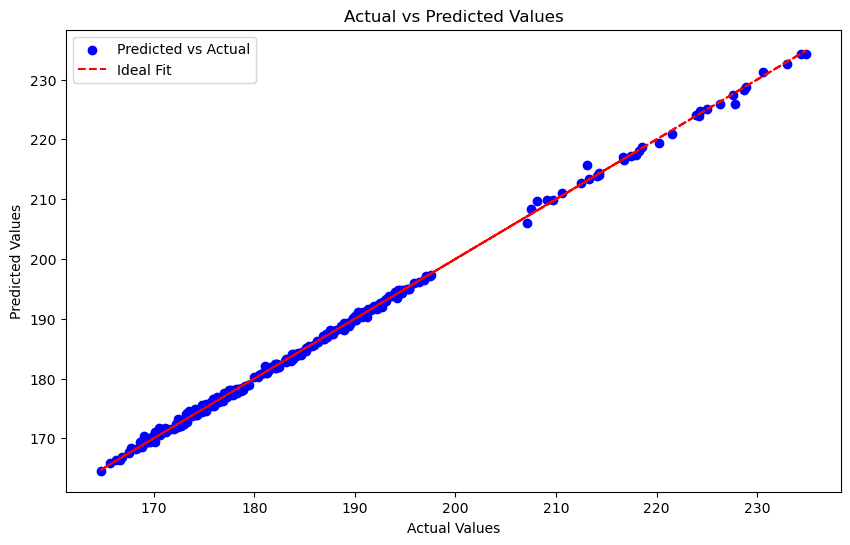

In [213]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [191]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [195]:
model = Sequential()
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8539.7129 - val_loss: 223.7371
Epoch 2/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.2449 - val_loss: 61.7836
Epoch 3/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.2322 - val_loss: 10.0602
Epoch 4/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.6400 - val_loss: 8.2638
Epoch 5/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3637 - val_loss: 6.3831
Epoch 6/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 23.0663 - val_loss: 4.0705
Epoch 7/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1629 - val_loss: 3.6188
Epoch 8/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6914 - val_loss: 3.9810
Epoch 9/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0285 - val_loss: 16.0600
Epoch 10/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9200 - val_loss: 7.1518
Epoch 11/100
803/803 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9410 - val_loss: 5.2607
Epoch 12/100
803/803 ━━━━━━━

In [197]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

In [199]:
model.save('Stock_model.h5')

In [201]:
netron.start('Stock_model.h5')

Serving 'Stock_model.h5' at http://localhost:8080


('localhost', 8080)